In [93]:
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
headlines = pd.read_csv('redditData/headlines.csv' , index_col=None).to_numpy()

In [77]:
print(headlines)

[['New filings reveal more luxury trips and opaque payments to Clarence Thomas’ wife, Ginni']
 ['Rural Washington library could be nation’s first to dissolve after book challenges, reshelving requests']
 ['Virginia’s ‘Moderate’ GOP Governor Is Quietly Funding Anti-Choice Extremists']
 ['Blue Envelope Bill aims to help drivers with autism and police during traffic stops']
 ['If An Ailing Mitch McConnell Stepped Aside, His Replacement Would Be a Republican']
 ['U.S. reminds migrants to apply for work permits following pressure from city officials']
 ['President Biden Comments to Reporters Before Florida Visit']
 ["Neo-Nazis parade swastika flags in Florida, chanting 'We are everywhere'"]
 ['The Press Should Take Its Bullhorn From Trump and Hand It to His Civil Society Critics']
 ['After nearly 30 years, Pennsylvania will end state funding for anti-abortion counseling centers']
 ["Nikki Haley calls for 'mental competency tests' for aging US leaders"]
 ["NC congressman introduces 'Stop Pot

In [81]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line[0])
    pol_score['headline'] = line[0]
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'New filings reveal more luxury trips and opaque payments to Clarence Thomas’ wife, Ginni'}, {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.0772, 'headline': 'Rural Washington library could be nation’s first to dissolve after book challenges, reshelving requests'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Virginia’s ‘Moderate’ GOP Governor Is Quietly Funding Anti-Choice Extremists'}]


In [82]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,New filings reveal more luxury trips and opaqu...
1,0.000,0.909,0.091,0.0772,Rural Washington library could be nation’s fir...
2,0.000,1.000,0.000,0.0000,Virginia’s ‘Moderate’ GOP Governor Is Quietly ...
3,0.098,0.736,0.166,0.2732,Blue Envelope Bill aims to help drivers with a...
4,0.000,1.000,0.000,0.0000,"If An Ailing Mitch McConnell Stepped Aside, Hi..."


In [83]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,New filings reveal more luxury trips and opaqu...,0
1,0.000,0.909,0.091,0.0772,Rural Washington library could be nation’s fir...,0
2,0.000,1.000,0.000,0.0000,Virginia’s ‘Moderate’ GOP Governor Is Quietly ...,0
3,0.098,0.736,0.166,0.2732,Blue Envelope Bill aims to help drivers with a...,1
4,0.000,1.000,0.000,0.0000,"If An Ailing Mitch McConnell Stepped Aside, Hi...",0


In [85]:
df2 = df[['headline', 'label']]
df2.to_csv('redditData/reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [86]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1].headline)[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1].headline)[:5])

Positive headlines:

['Blue Envelope Bill aims to help drivers with autism and police during traffic stops', 'The Press Should Take Its Bullhorn From Trump and Hand It to His Civil Society Critics', 'Trump lawyer says ex-president doesn\'t need trial prep: He is "incredibly intelligent"', 'Consistent Signs of Erosion in Black and Hispanic Support for Biden - It’s a weakness that could manifest itself as low Democratic turnout even if Trump and Republicans don’t gain among those groups.', 'Florida and Texas universities excluded from list of LGBTQ+ friendly schools']

Negative headlines:

['U.S. reminds migrants to apply for work permits following pressure from city officials', "NC congressman introduces 'Stop Pot Act' to curb recreational marijuana legalization", "Peoria council points to sex offender at vice mayor's house as grounds for resignation", 'DeSantis Rejected $350 Million in Climate Funding Before Hurricane Idalia: The Florida governor rejected millions in climate funding. N

In [90]:
print('Actual Values')
print(df.label.value_counts(), end='\n\n')

print('Percentage Values')
print(df.label.value_counts(normalize=True) * 100)

Actual Values
 0    414
-1    308
 1    194
Name: label, dtype: int64

Percentage Values
 0    45.196507
-1    33.624454
 1    21.179039
Name: label, dtype: float64


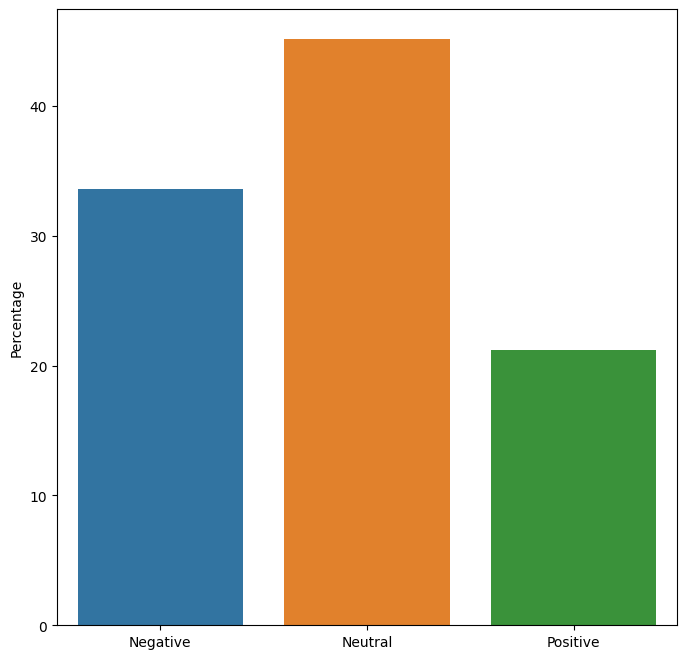

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()